In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from urllib.parse import urlencode

In [113]:
CH4_bySector_csv = os.path.join("GHG Emissions/CH4_bySector.csv")
N2O_bySector_csv = os.path.join("GHG Emissions/NO2_bySector.csv")

CH4_bySector_df = pd.read_csv(CH4_bySector_csv)
N2O_bySector_df = pd.read_csv(N2O_bySector_csv)
N2O_bySector_df

,Unnamed: 0,Country,Year,Agriculture,Agriculture (per capita),Energy,Fugitive Emissions,Fugitive Emissions (per capita),Industry,Industry (per capita),Land-Use Change and Forestry,Land-Use Change and Forestry (per capita),Other Fuel Combustion,Total excluding LUCF,Total excluding LUCF (per capita),Total including LUCF,Total including LUCF (per capita),Waste,Waste (per capita)
0,0,Afghanistan,1990,2.72,0.219143,0.40,0.0,0.0,0.0,0.0,0.00,0.000000,0.40,3.25,0.261843,3.25,0.261843,0.14,0.011279
1,1,Afghanistan,1991,2.80,0.210542,0.36,0.0,0.0,0.0,0.0,0.00,0.000000,0.36,3.30,0.248139,3.30,0.248139,0.14,0.010527
2,2,Afghanistan,1992,2.75,0.189838,0.31,0.0,0.0,0.0,0.0,0.00,0.000000,0.31,3.21,0.221593,3.21,0.221593,0.15,0.010355
3,3,Afghanistan,1993,2.78,0.175760,0.27,0.0,0.0,0.0,0.0,0.00,0.000000,0.27,3.21,0.202946,3.21,0.202946,0.16,0.010116
4,4,Afghanistan,1994,2.60,0.152260,0.22,0.0,0.0,0.0,0.0,0.00,0.000000,0.22,2.99,0.175100,2.99,0.175100,0.17,0.009955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,Zimbabwe,2012,5.60,0.426992,1.15,0.0,0.0,0.0,0.0,0.03,0.002287,1.15,6.89,0.525353,6.92,0.527640,0.14,0.010675
5261,5261,Zimbabwe,2013,5.24,0.392509,1.27,0.0,0.0,0.0,0.0,0.02,0.001498,1.27,6.65,0.498127,6.67,0.499625,0.15,0.011236
5262,5262,Zimbabwe,2014,4.71,0.346655,1.39,0.0,0.0,0.0,0.0,0.02,0.001472,1.39,6.25,0.459999,6.27,0.461471,0.15,0.011040
5263,5263,Zimbabwe,2015,4.94,0.357582,1.51,0.0,0.0,0.0,0.0,0.07,0.005067,1.51,6.61,0.478465,6.68,0.483532,0.16,0.011582


In [101]:
N2O_bySector_df.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Agriculture',
       'Agriculture (per capita)', 'Energy', 'Fugitive Emissions',
       'Fugitive Emissions (per capita)', 'Industry', 'Industry (per capita)',
       'Land-Use Change and Forestry',
       'Land-Use Change and Forestry (per capita)', 'Other Fuel Combustion',
       'Total excluding LUCF', 'Total excluding LUCF (per capita)',
       'Total including LUCF', 'Total including LUCF (per capita)', 'Waste',
       'Waste (per capita)'],
      dtype='object')

In [105]:
wanted_columns = ['Country', 'Year', 'Agriculture', "Agriculture (per capita)"]
[x for x in N2O_bySector_df.columns if x not in wanted_columns]

['Unnamed: 0',
 'Energy',
 'Fugitive Emissions',
 'Fugitive Emissions (per capita)',
 'Industry',
 'Industry (per capita)',
 'Land-Use Change and Forestry',
 'Land-Use Change and Forestry (per capita)',
 'Other Fuel Combustion',
 'Total excluding LUCF',
 'Total excluding LUCF (per capita)',
 'Total including LUCF',
 'Total including LUCF (per capita)',
 'Waste',
 'Waste (per capita)']

In [103]:
wanted_columns = ['Country', 'Year', 'Agriculture', "Agriculture (per capita)"]
# N2O_bySector_df.drop(columns = [x for x in N2O_bySector_df.columns if x not in wanted_columns])

In [118]:
N2O_AG = N2O_bySector_df[wanted_columns]
N2O_AG
N2O_AG.to_csv("N2O_AG.csv", index=False)

In [119]:
CH4_AG = CH4_bySector_df[wanted_columns]
CH4_AG
CH4_AG.to_csv("CH4_AG.csv", index=False)

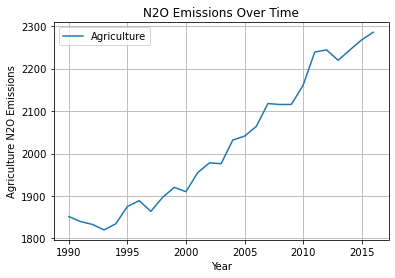

In [115]:
N2O_AG[N2O_AG['Country'] == "World"].plot.line("Year", "Agriculture")

plt.title('N2O Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Agriculture N2O Emissions')
plt.grid()

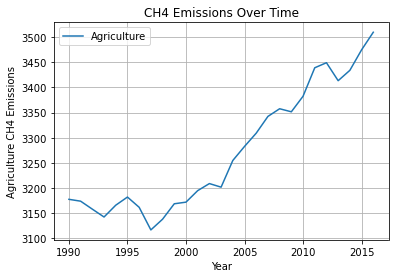

In [117]:
CH4_AG[CH4_AG['Country'] == "World"].plot.line("Year", "Agriculture")

plt.title('CH4 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Agriculture CH4 Emissions')
plt.grid()

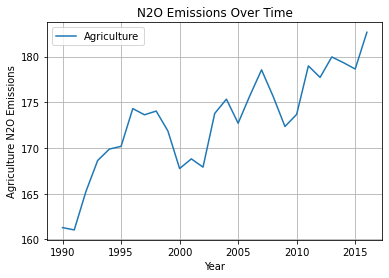

In [110]:
N2O_AG[N2O_AG['Country'] == "United States"].plot.line("Year", "Agriculture")

plt.title('N2O Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Agriculture N2O Emissions')
plt.grid()

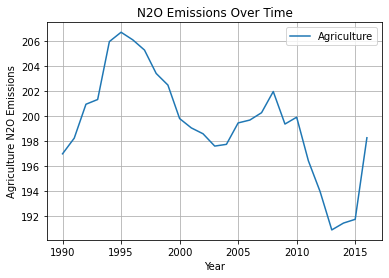

In [111]:
CH4_AG[CH4_AG['Country'] == "United States"].plot.line("Year", "Agriculture")

plt.title('N2O Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Agriculture N2O Emissions')
plt.grid()

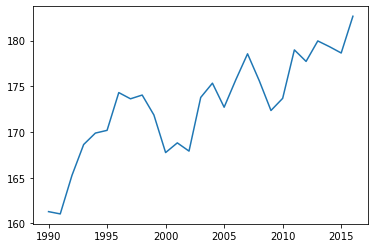

In [101]:
plt.figure(num = 1)

plt.plot(N2O_AG[N2O_AG['Country'] == "United States"]["Year"], 
         N2O_AG[N2O_AG['Country'] == "United States"]["Agriculture"])

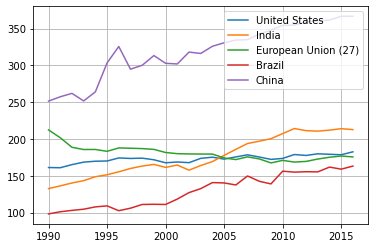

In [114]:
x1 = N2O_AG[N2O_AG['Country'] == "United States"]["Year"]
y1 = N2O_AG[N2O_AG['Country'] == "United States"]["Agriculture"]

x2 = N2O_AG[N2O_AG['Country'] == "India"]["Year"]
y2 = N2O_AG[N2O_AG['Country'] == "India"]["Agriculture"]

x3 = N2O_AG[N2O_AG['Country'] == "European Union (27)"]["Year"]
y3 = N2O_AG[N2O_AG['Country'] == "European Union (27)"]["Agriculture"]

x4 = N2O_AG[N2O_AG['Country'] == "Brazil"]["Year"]
y4 = N2O_AG[N2O_AG['Country'] == "Brazil"]["Agriculture"]

x5 = N2O_AG[N2O_AG['Country'] == "China"]["Year"]
y5 = N2O_AG[N2O_AG['Country'] == "China"]["Agriculture"]

fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='United States')
ax.plot(x2,y2,label='India')
ax.plot(x3,y3,label='European Union (27)')
ax.plot(x4,y4,label='Brazil')
ax.plot(x5,y5,label='China')

plt.legend(loc=1)
plt.grid()

In [115]:
N2O_AG["Country"]

0                            Afghanistan
1                            Afghanistan
2                            Afghanistan
3                            Afghanistan
4                            Afghanistan
5                            Afghanistan
6                            Afghanistan
7                            Afghanistan
8                            Afghanistan
9                            Afghanistan
10                           Afghanistan
11                           Afghanistan
12                           Afghanistan
13                           Afghanistan
14                           Afghanistan
15                           Afghanistan
16                           Afghanistan
17                           Afghanistan
18                           Afghanistan
19                           Afghanistan
20                           Afghanistan
21                           Afghanistan
22                           Afghanistan
23                           Afghanistan
24              

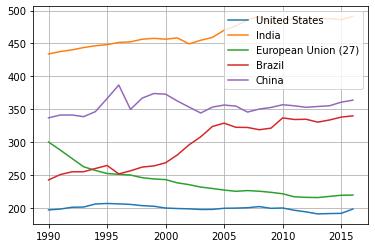

In [112]:
x1 = CH4_AG[CH4_AG['Country'] == "United States"]["Year"]
y1 = CH4_AG[CH4_AG['Country'] == "United States"]["Agriculture"]

x2 = CH4_AG[CH4_AG['Country'] == "India"]["Year"]
y2 = CH4_AG[CH4_AG['Country'] == "India"]["Agriculture"]

x3 = CH4_AG[CH4_AG['Country'] == "European Union (27)"]["Year"]
y3 = CH4_AG[CH4_AG['Country'] == "European Union (27)"]["Agriculture"]

x4 = CH4_AG[CH4_AG['Country'] == "Brazil"]["Year"]
y4 = CH4_AG[CH4_AG['Country'] == "Brazil"]["Agriculture"]

x5 = CH4_AG[CH4_AG['Country'] == "China"]["Year"]
y5 = CH4_AG[CH4_AG['Country'] == "China"]["Agriculture"]

fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='United States')
ax.plot(x2,y2,label='India')
ax.plot(x3,y3,label='European Union (27)')
ax.plot(x4,y4,label='Brazil')
ax.plot(x5,y5,label='China')

plt.legend(loc=1)
plt.grid()

In [80]:
pd.set_option("max_rows", None)
N2O_AG.groupby("Country").count()

,Year,Agriculture,Agriculture (per capita)
Country,,,
Afghanistan,27,27,27
Albania,27,27,27
Algeria,27,27,27
Andorra,27,27,27
Angola,27,27,27
Antigua and Barbuda,27,27,27
Argentina,27,27,27
Armenia,27,27,27
Australia,27,27,27


<AxesSubplot:xlabel='Year'>

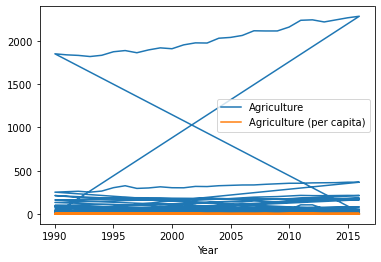

In [90]:
N2O_AG.set_index('Year').plot()

In [4]:
historical_emission_csv = os.path.join("historical_emission.csv")

historical_emission_df = pd.read_csv(historical_emission_csv)
historical_emission_df

,Unnamed: 0,Country,Data source,Sector,Gas,Unit,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,49358.03,49854.98,49440.79,48961.60,...,36810.09,36976.63,37342.50,36025.05,36012.63,35287.61,35079.63,34985.53,35125.44,34967.34
1,1,World,CAIT,Total excluding LUCF,All GHG,MtCO₂e,46140.95,45942.58,45863.97,45594.92,...,33112.32,32905.54,32704.64,32354.03,31815.97,31090.95,30882.98,30788.91,30928.80,30770.70
2,2,World,CAIT,Total including LUCF,CO2,MtCO₂e,36700.36,37141.50,37001.65,36772.21,...,26603.72,26678.24,26994.12,25935.70,25829.13,25200.35,25059.69,24927.99,24992.27,24789.02
3,3,World,CAIT,Energy,All GHG,MtCO₂e,36013.52,35966.93,35993.15,35914.54,...,25228.41,25080.49,24928.76,24546.13,24055.62,23466.25,23430.26,23347.72,23505.05,23366.11
4,4,World,CAIT,Total excluding LUCF,CO2,MtCO₂e,34017.38,33956.18,34044.98,33947.17,...,23391.94,23235.48,23086.25,22697.36,22224.28,21595.51,21454.86,21323.19,21387.44,21184.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,8490,Nauru,CAIT,Land-Use Change and Forestry,CH4,MtCO₂e,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
8491,8491,Tuvalu,CAIT,Land-Use Change and Forestry,N2O,MtCO₂e,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
8492,8492,Chad,CAIT,Fugitive Emissions,CO2,MtCO₂e,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8493,8493,Tuvalu,CAIT,Land-Use Change and Forestry,CH4,MtCO₂e,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
historical_emission_df[historical_emission_df['Sector'] == 'Agriculture']

,Unnamed: 0,Country,Data source,Sector,Gas,Unit,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
22,22,World,CAIT,Agriculture,All GHG,MtCO₂e,5795.51,5742.44,5678.15,5633.18,...,5089.10,5034.79,4980.67,5050.88,5057.44,5000.42,4962.59,4991.32,5013.56,5029.15
30,30,World,CAIT,Agriculture,CH4,MtCO₂e,3509.69,3474.72,3434.05,3413.44,...,3168.91,3138.26,3116.98,3161.94,3182.25,3166.07,3142.63,3158.24,3174.07,3177.76
53,53,World,CAIT,Agriculture,N2O,MtCO₂e,2285.82,2267.72,2244.09,2219.74,...,1920.19,1896.53,1863.69,1888.94,1875.18,1834.35,1819.97,1833.07,1839.49,1851.38
113,113,China,CAIT,Agriculture,All GHG,MtCO₂e,730.60,727.46,716.93,714.78,...,687.29,667.14,644.66,712.51,669.60,610.47,590.48,603.32,598.58,588.43
116,116,India,CAIT,Agriculture,All GHG,MtCO₂e,704.16,700.10,699.80,698.36,...,623.28,619.68,612.42,607.05,599.65,595.23,587.23,580.52,574.02,566.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,Maldives,CAIT,Agriculture,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8044,8044,Cook Islands,CAIT,Agriculture,N2O,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8197,8197,Maldives,CAIT,Agriculture,CH4,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8223,8223,Maldives,CAIT,Agriculture,N2O,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
historical_emission_yearly = historical_emission_df.melt(id_vars = ['Country', 'Sector', 'Gas'], value_vars = historical_emission_df.columns[6:], var_name = "Year", value_name = "All GHG Emission Units")
historical_emission_yearly = historical_emission_yearly[historical_emission_yearly['Gas'] == 'All GHG']
historical_emission_yearly = historical_emission_yearly.drop(columns = "Gas")
historical_emission_yearly = historical_emission_yearly[~historical_emission_yearly["Sector"].isin(["Total excluding LUCF", "Total including LUCF"])]

historical_emission_yearly = historical_emission_yearly.sort_values(by = "Year", ascending = True)

historical_emission_yearly_world = historical_emission_yearly[historical_emission_yearly['Country'] == "World"]
historical_emission_yearly_top5 = historical_emission_yearly[historical_emission_yearly['Country'].isin(["United States", "India", "Brazil", "China", "European Union (27)"])]
historical_emission_yearly_top5.head(15)

,Country,Sector,Year,All GHG Emission Units
229357,European Union (27),Land-Use Change and Forestry,1990,-301.70
223217,Brazil,Fugitive Emissions,1990,5.03
221495,Brazil,Manufacturing/Construction,1990,46.60
221515,India,Waste,1990,24.54
221362,India,Other Fuel Combustion,1990,70.59
221380,European Union (27),Waste,1990,165.17
221447,United States,Other Fuel Combustion,1990,140.96
221391,India,Building,1990,56.40
221441,Brazil,Electricity/Heat,1990,28.10
221394,European Union (27),Other Fuel Combustion,1990,155.06


In [29]:
historical_emission_yearly.to_csv("historical_emission_yearly.csv", index=False)

In [15]:
historical_emission_df.columns[6:]

Index(['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990'],
      dtype='object')

In [31]:
historical_emission_yearly_world

All GHG Emission Units
Country     Year                        
Afghanistan 1990                   48.66
            1991                   48.09
            1992                   43.19
            1993                   42.40
            1994                   41.56
...                                  ...
Zimbabwe    2012                  181.14
            2013                  181.54
            2014                  177.39
            2015                  181.93
            2016                  176.18

[5265 rows x 1 columns]

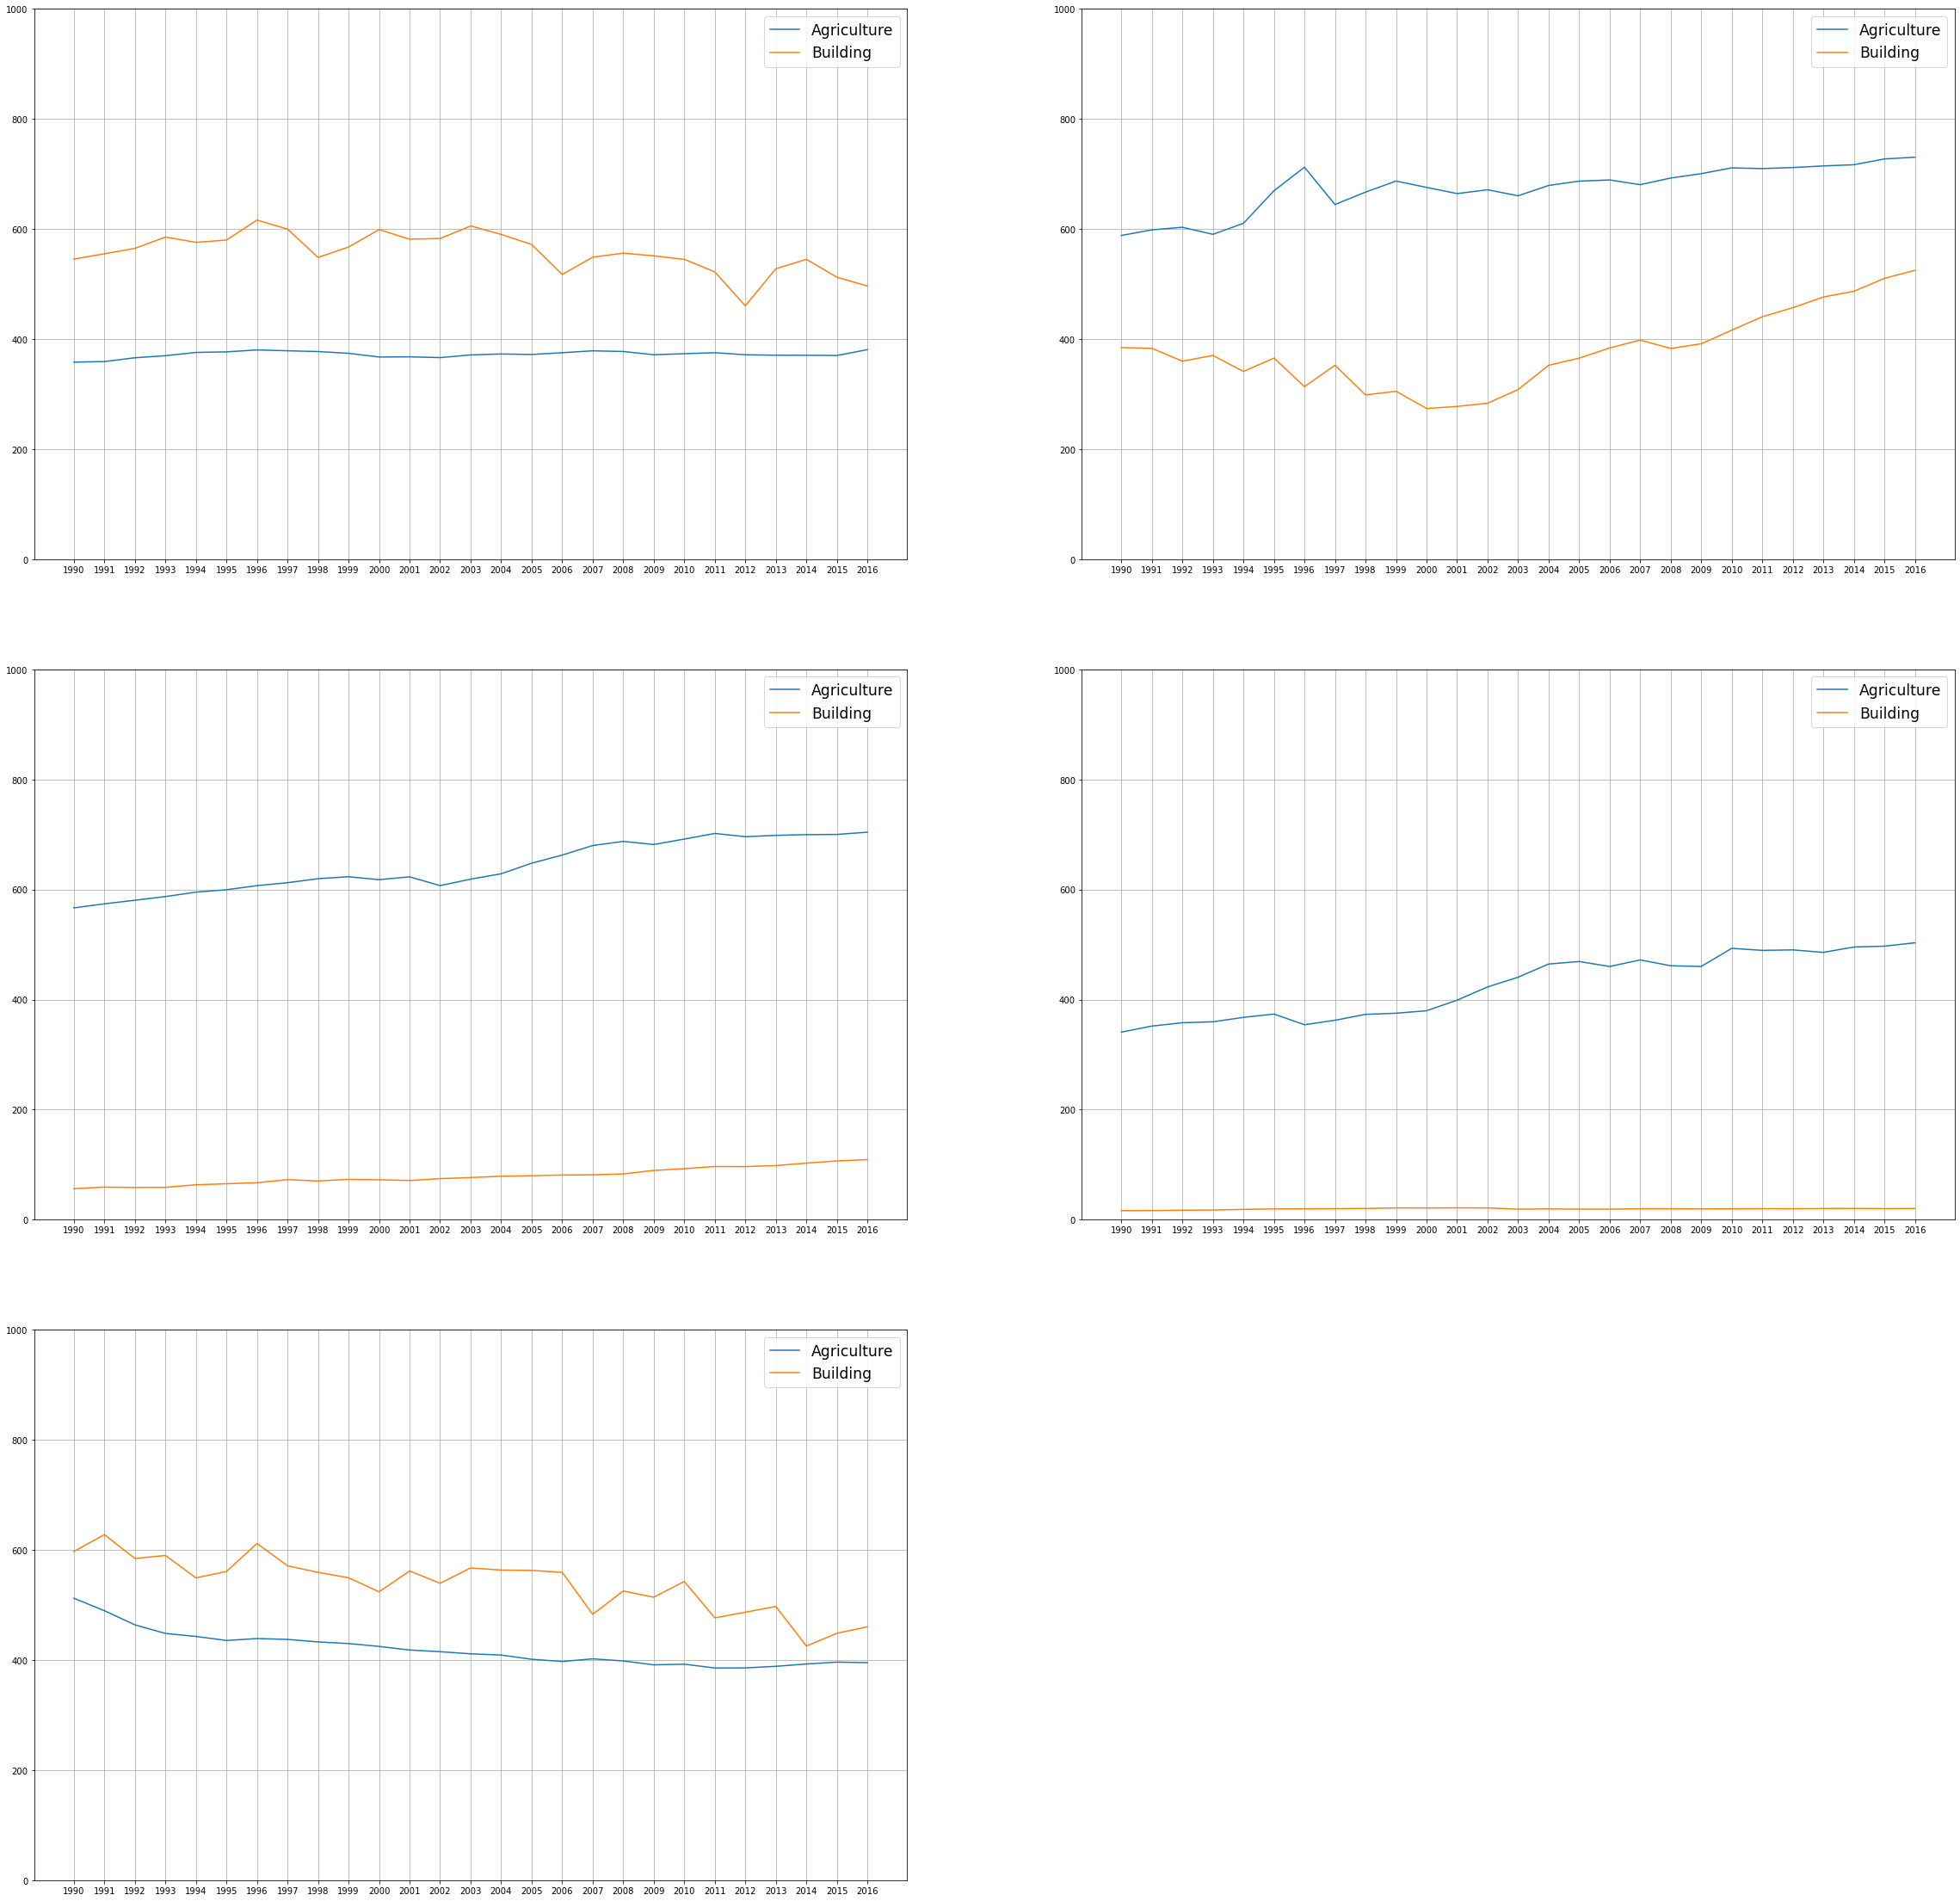

In [95]:
fig=plt.figure(figsize = [40, 40])

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(321)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(322)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(323)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(324)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(325)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

In [35]:
~historical_emission_yearly["Sector"].isin(["Total excluding LUCF", "Total including LUCF"])

0         False
1         False
8         False
9         False
20        False
          ...  
227807    False
229263    False
229266    False
229332    False
229342    False
Name: Sector, Length: 10422, dtype: bool

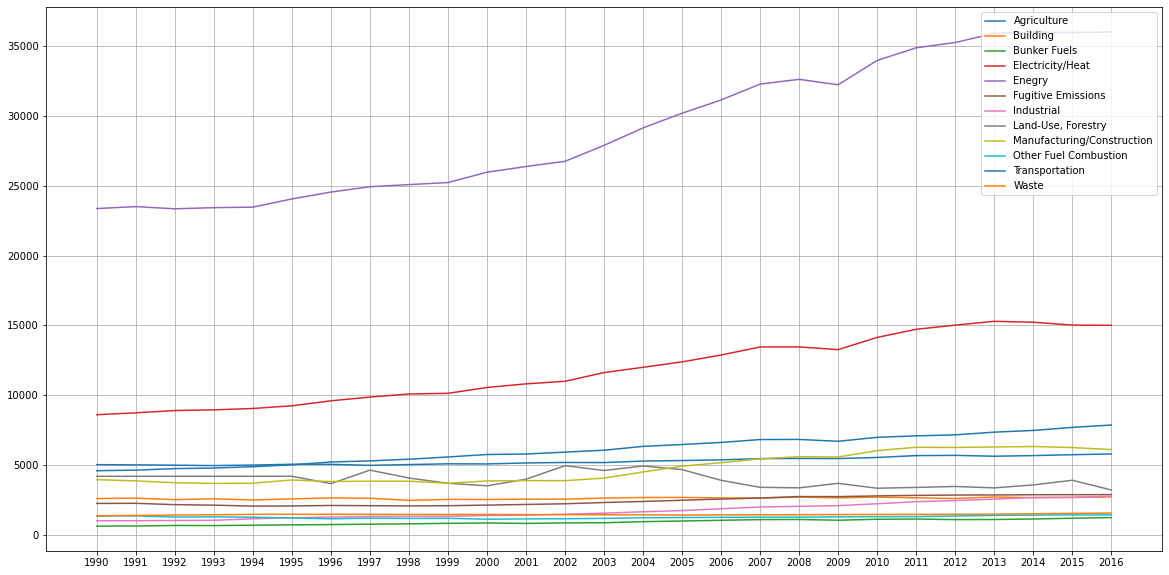

In [66]:
x1 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Agriculture"]["Year"]
y1 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Agriculture"]["All GHG Emission Units"]

x2 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Building"]["Year"]
y2 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Building"]["All GHG Emission Units"]

x3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["Year"]
y3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["All GHG Emission Units"]

x4 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Electricity/Heat"]["Year"]
y4 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Electricity/Heat"]["All GHG Emission Units"]

x5 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Energy"]["Year"]
y5 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Energy"]["All GHG Emission Units"]

x6 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Fugitive Emissions"]["Year"]
y6 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Fugitive Emissions"]["All GHG Emission Units"]

x7 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Industrial Processes"]["Year"]
y7 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Industrial Processes"]["All GHG Emission Units"]

x8 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Land-Use Change and Forestry"]["Year"]
y8 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Land-Use Change and Forestry"]["All GHG Emission Units"]

x9 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Manufacturing/Construction"]["Year"]
y9 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Manufacturing/Construction"]["All GHG Emission Units"]

x10 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Other Fuel Combustion"]["Year"]
y10 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Other Fuel Combustion"]["All GHG Emission Units"]

x11 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Transportation"]["Year"]
y11 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Transportation"]["All GHG Emission Units"]

x12 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Waste"]["Year"]
y12 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Waste"]["All GHG Emission Units"]


fig=plt.figure(figsize = [20,10])
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')
ax.plot(x3,y3,label='Bunker Fuels')
ax.plot(x4,y4,label='Electricity/Heat')
ax.plot(x5,y5,label='Enegry')
ax.plot(x6,y6,label='Fugitive Emissions')
ax.plot(x7,y7,label='Industrial')
ax.plot(x8,y8,label='Land-Use, Forestry')
ax.plot(x9,y9,label='Manufacturing/Construction')
ax.plot(x10,y10,label='Other Fuel Combustion')
ax.plot(x11,y11,label='Transportation')
ax.plot(x12,y12,label='Waste')

plt.legend(loc=1)
plt.grid()

AttributeError: 'AxesSubplot' object has no attribute 'plt'

3         2016
6         2016
16        2016
18        2016
22        2016
          ... 
220914    1990
220916    1990
220934    1990
220938    1990
220948    1990
Name: Year, Length: 324, dtype: object

22        5795.51
8517      5742.44
17012     5678.15
25507     5633.18
34002     5693.47
42497     5678.14
50992     5542.99
59487     5467.33
67982     5473.29
76477     5460.19
84972     5372.79
93467     5323.84
101962    5286.64
110457    5177.99
118952    5186.94
127447    5149.92
135942    5082.24
144437    5089.10
152932    5034.79
161427    4980.67
169922    5050.88
178417    5057.44
186912    5000.42
195407    4962.59
203902    4991.32
212397    5013.56
220892    5029.15
Name: All GHG Emission Units, dtype: float64